In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
pd.options.display.max_rows=200

In [22]:
Data_1 = pd.read_csv('D:/Project/Real_Estate_Price Prediction/File/Bengaluru_House_Data.csv')
Data_1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [24]:
print('\nThe Shape of Data is :',Data_1.shape)



The Shape of Data is : (13320, 9)


In [29]:
Data_2 = Data_1.drop(['area_type','availability','society','balcony'],axis='columns')
print(Data_2.head(7))
Data_2.isna().sum()
Data_2.shape

                   location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00
5                Whitefield      2 BHK       1170   2.0   38.00
6          Old Airport Road      4 BHK       2732   4.0  204.00


(13320, 5)

In [32]:
Data_3 = Data_2.dropna()
print(Data_3.isnull().sum())
Data_3.shape

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


(13303, 5)

In [33]:
Data_3['size'].unique()
Data_3['BHK'] = Data_3['size'].apply(lambda x : int(x.split(' ')[0]))
Data_3.head()
Data_3[Data_3['BHK']>20]
Data_3['total_sqft'].unique()
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


C:\Users\Shree\AppData\Local\Temp\ipykernel_12280\2771198233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_3['BHK'] = Data_3['size'].apply(lambda x : int(x.split(' ')[0]))


In [34]:
print(Data_3[~Data_3['total_sqft'].apply(is_float)].head(10))

def Convert_sqft_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

               location       size      total_sqft     bath    price  BHK
30            Yelahanka      4 BHK     2100 - 2850  4.00000  186.000    4
56          Devanahalli  4 Bedroom     3010 - 3410  2.69261  192.000    4
81          Hennur Road  4 Bedroom     2957 - 3450  2.69261  224.500    4
122              Hebbal      4 BHK     3067 - 8156  4.00000  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105  2.00000   54.005    2
165            Sarjapur      2 BHK     1145 - 1340  2.00000   43.490    2
188            KR Puram      2 BHK     1015 - 1540  2.00000   56.800    2
224         Devanahalli      3 BHK     1520 - 1740  2.69261   74.820    3
410             Kengeri      1 BHK  34.46Sq. Meter  1.00000   18.500    1
549         Hennur Road      2 BHK     1195 - 1440  2.00000   63.770    2


In [35]:
Data_4 = Data_3.copy()
Data_4['total_sqft'] = Data_4['total_sqft'].apply(Convert_sqft_num)
Data_4 = Data_4[Data_4.total_sqft.notnull()]
Data_4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [45]:
Data_5 = Data_4.copy()
Data_5['Price_per_Sqft'] = Data_5['price'] * 100000 / Data_5['total_sqft']
print(len(Data_5.location.unique()))
Data_5.head()

1298


,location,size,total_sqft,bath,price,BHK,Price_per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
Data_5.location = Data_5.location.apply(lambda x: x.strip())
location_stats = Data_5['location'].value_counts(ascending=False)
print(location_stats)

location
Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64


In [52]:
location_stats.values.sum()
len(location_stats[location_stats <= 10])

1047

In [53]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [57]:
len(Data_5.location.unique())
Data_5.shape

(13257, 7)

In [66]:
Data_5.location = Data_5.location.apply(lambda x:'Other'if x in location_stats_less_than_10 else x)
len(Data_5.location.unique())
Data_6 = Data_5[~(Data_5.total_sqft / Data_5.BHK < 300)]
Data_6.shape

(12513, 7)

In [67]:
print(Data_6.Price_per_Sqft.describe())

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subf in df.groupby('location'):
        m = np.mean(subf.Price_per_Sqft)
        st = np.std(subf.Price_per_Sqft)
        reduce_df = subf[(subf.Price_per_Sqft > (m-st)) & (subf.Price_per_Sqft <= (m+st))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out

Data_7 = remove_pps_outliers(Data_6)
Data_7.shape

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: Price_per_Sqft, dtype: float64


(10247, 7)

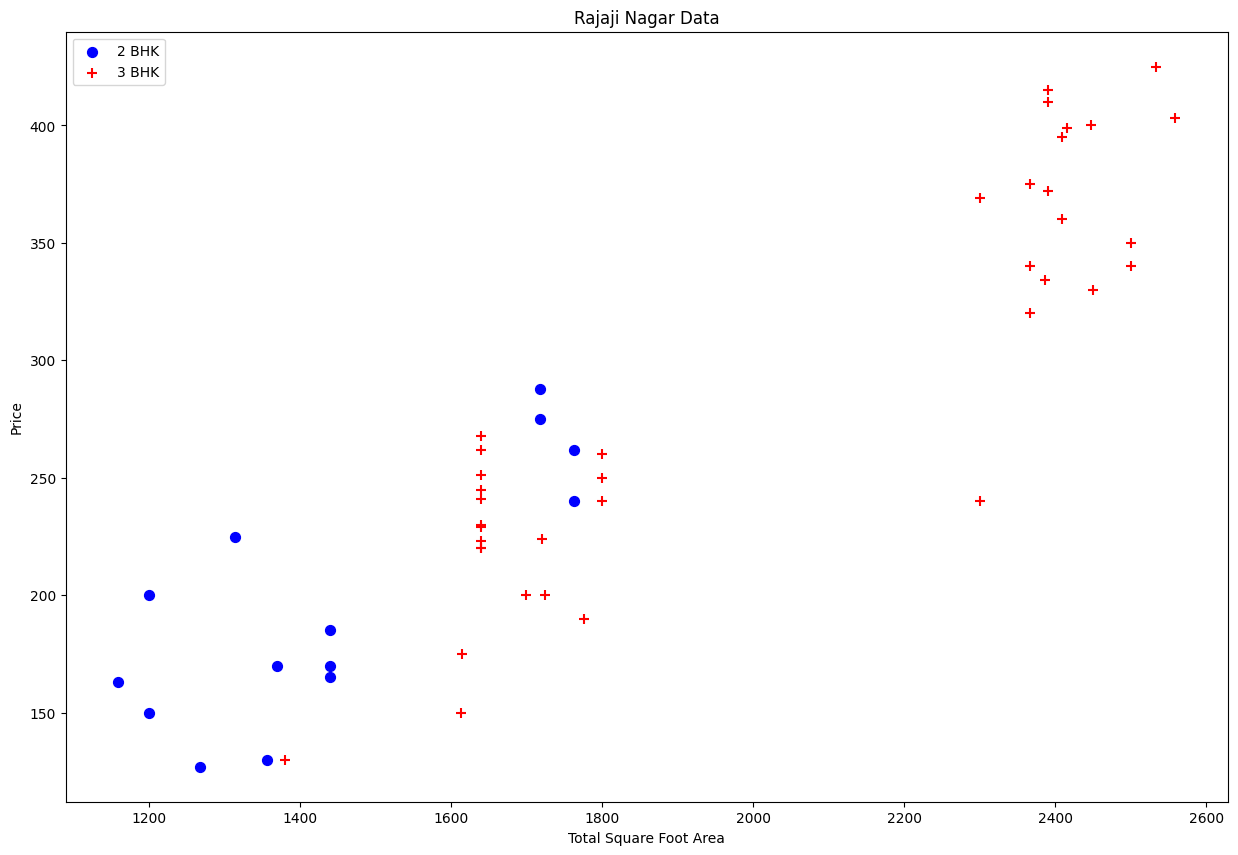

In [68]:
def Plot_scatter_chart(df,location):
    bhk_2 = df[(df.location == location) & (df.BHK == 2)]
    bhk_3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk_3.total_sqft,bhk_3.price,color='red',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot Area')
    plt.ylabel('Price')
    plt.title(location+' Data')
    plt.legend()
    plt.show()

Plot_scatter_chart(Data_7,'Rajaji Nagar')

In [78]:
Data_7.head(2)

,location,size,total_sqft,bath,price,BHK,Price_per_Sqft
0,Devarabeesana Halli,3 BHK,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,149.0,3,8514.285714


In [85]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.Price_per_Sqft),
                'std': np.std(bhk_df.Price_per_Sqft),
                'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
Data_8 = remove_bhk_outliers(Data_7)
# df8 = df7.copy()
Data_8.shape

(7336, 7)

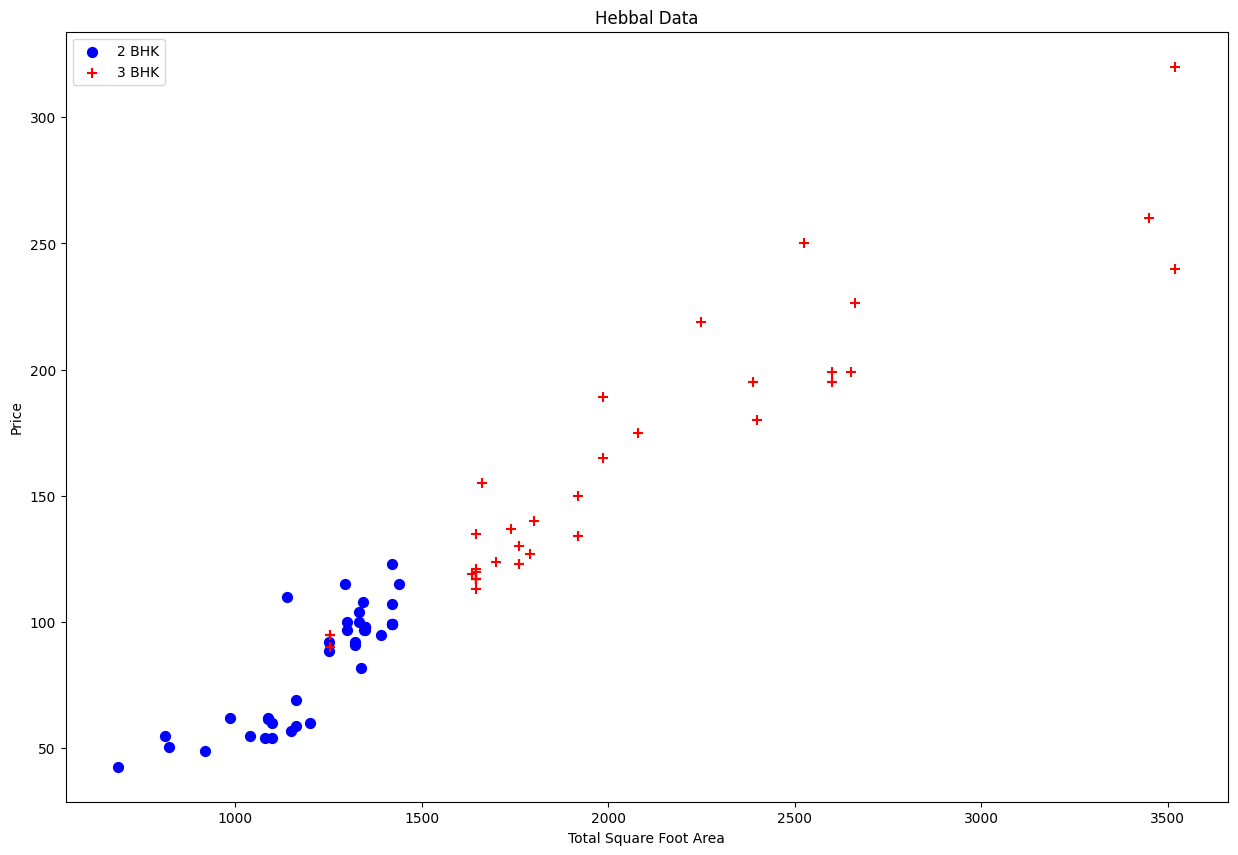

In [89]:
Plot_scatter_chart(Data_8,'Hebbal')

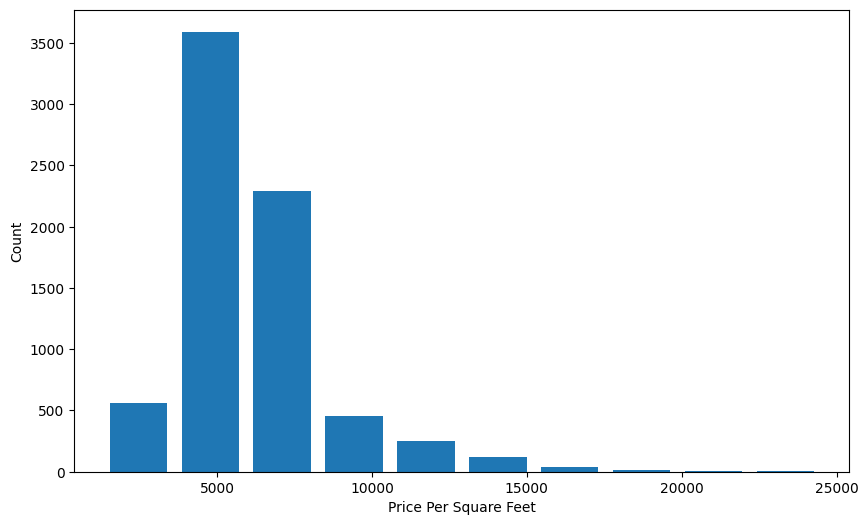

In [95]:
matplotlib.rcParams["figure.figsize"] = (10,6)
plt.hist(Data_8.Price_per_Sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.show()

(array([4.758e+03, 1.788e+03, 6.690e+02, 8.000e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

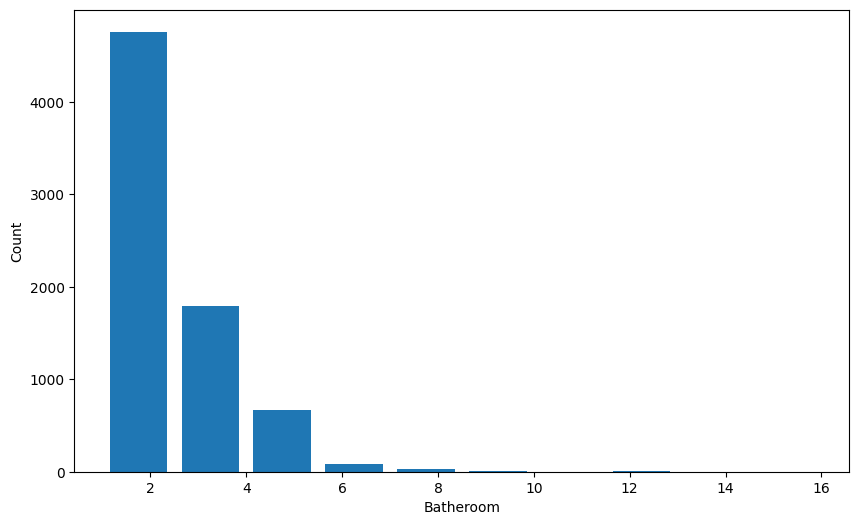

In [96]:
plt.xlabel('Batheroom')
plt.ylabel('Count')
plt.hist(Data_8['bath'],rwidth=0.8)

In [103]:
Data_8[Data_8['bath'] < Data_8['BHK']+2]
Data_9 = Data_8[Data_8['bath'] < Data_8['BHK']+2]
Data_9.shape

(7258, 7)

In [131]:
Data_10 = Data_9.drop(['size','Price_per_Sqft'],axis='columns')
Data_10.head(5)

,location,total_sqft,bath,price,BHK
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


In [145]:
Dummie = pd.get_dummies(Data_10['location'],dtype=int)
Dummie.head(2)

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
Data_11 = pd.concat([Data_10.drop('location',axis='columns'),Dummie.drop('Other',axis='columns')],axis='columns')
print(Data_11.shape)
Data_11.head(2)

(7258, 262)


,total_sqft,bath,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
from sklearn.model_selection import train_test_split
X = Data_11.drop('price',axis='columns')
Y = Data_11['price']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
print('\nThe Length of Training Model is :{0}'.format(len(X_train)))
print('\nThe Length of Testing  Model is :{0}'.format(len(X_test)))


The Length of Training Model is :5806

The Length of Testing  Model is :1452


In [218]:
from sklearn.linear_model import LinearRegression

liner_model = LinearRegression()
liner_model.fit(X_train,y_train)

LinearRegression()

In [219]:
print('\nThe Acuurecy of Testing  Model is :',liner_model.score(X_test,y_test))
print('\nThe Acuurecy of Training Model is :',liner_model.score(X_train,y_train))


The Acuurecy of Testing  Model is : 0.8033688219334232

The Acuurecy of Training Model is : 0.8694718631473012


In [220]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.87064615, 0.80077796, 0.85145908, 0.86516844, 0.82406302])

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def Best_model_using_GridSearchCV(X,Y):
    Algorithm = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [1,2,3]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    score = []
    CV = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for Algorithm_name , Config in Algorithm.items():
        GS = GridSearchCV(Config['model'],Config['params'],cv=CV,return_train_score=False)
        GS.fit(X,Y)
        score.append({
            'model': Algorithm_name,
            'best Score':GS.best_score_,
            'best Param':GS.best_params_
        })  
    return pd.DataFrame(score,columns=['model','best Score','best Param'])

Best_model_using_GridSearchCV(X,Y) 

C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

,model,best Score,best Param
0,linear_regression,0.842423,{'n_jobs': 1}
1,lasso,0.705397,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.724240,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [246]:
'''Prediction function.'''

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    Index = np.zeros(len(X.columns))
    Index[0] = sqft
    Index[1] = bath
    Index[2] = bhk
    if loc_index >= 0:
        Index[loc_index] = 1

    return liner_model.predict([Index])[0] 


In [274]:
predict_price('1st Phase JP Nagar',800,2,3)

C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.29458271087537

In [277]:
'''Export The Model To pickle File'''

import pickle
with open('D:/Project/Real_Estate_Price Prediction/File/Bannglore_Home_Price(Export).pickle','wb') as A :
    pickle.dump(liner_model,A)

In [278]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("D:/Project/Real_Estate_Price Prediction/File/columns.json","w") as f:
    f.write(json.dumps(columns))